# Movie Recommendation System using Biclustering
Implement a movie recommendation system using biclustering. Load the `rating.csv` and `movie.csv` datasets, preprocess them into a user-item matrix, and apply a biclustering algorithm to identify user-movie subgroups. Analyze the biclusters to discover patterns in user preferences and movie characteristics, then develop a recommendation strategy based on these patterns. Visualize the results to illustrate the effectiveness of biclustering and document the methodology, findings, and recommendation process in a research-oriented Jupyter notebook.

## Load and Prepare Data

Load the 'rating.csv' and 'movie.csv' datasets into pandas DataFrames. Inspect the data, handle any missing values, and transform it into a user-item matrix suitable for biclustering, where rows represent users and columns represent movies.


**Step#1**:
First, we will import the pandas library to work with DataFrames. Then, we will load both `rating.csv` and `movie.csv` files into separate DataFrames as `ratings_df` and `movies_df`, respectively. After loading the data, we will display the first 5 rows and concise summary (info) for each DataFrame to understand their structure and check for initial missing values.



In [1]:
import pandas as pd

# Load the datasets
ratings_df = pd.read_csv('/content/rating.csv')
movies_df = pd.read_csv('/content/movie.csv')

print("Ratings DataFrame - First 5 rows:")
print(ratings_df.head())
print("\nRatings DataFrame - Info:")
ratings_df.info()

print("\nMovies DataFrame - First 5 rows:")
print(movies_df.head())
print("\nMovies DataFrame - Info:")
movies_df.info()

Ratings DataFrame - First 5 rows:
   userId  movieId  rating            timestamp
0       1      2.0     3.5  2005-04-02 23:53:47
1       1     29.0     3.5  2005-04-02 23:31:16
2       1     32.0     3.5  2005-04-02 23:33:39
3       1     47.0     3.5  2005-04-02 23:32:07
4       1     50.0     3.5  2005-04-02 23:29:40

Ratings DataFrame - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382523 entries, 0 to 382522
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     382523 non-null  int64  
 1   movieId    382522 non-null  float64
 2   rating     382522 non-null  float64
 3   timestamp  382522 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 11.7+ MB

Movies DataFrame - First 5 rows:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)  

###**Step#2:** Now that the individual dataframes are loaded, we will merge the `ratings_df` and `movies_df` on `movieId` to combine the rating information with movie titles. After merging, we will create a user-item matrix using the `pivot_table` function, with `userId` as index, `title` as columns, and `rating` as values, filling any missing values (movies not rated by a user) with 0.



In [2]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId', how='left')

print("Merged DataFrame - First 5 rows:")
print(merged_df.head())
print("\nMerged DataFrame - Info:")
merged_df.info()

user_movie_matrix = merged_df.pivot_table(index='userId', columns='title', values='rating').fillna(0)

print("\nUser-Item Matrix - First 5 rows:")
print(user_movie_matrix.head())
print("\nUser-Item Matrix - Shape:", user_movie_matrix.shape)

Merged DataFrame - First 5 rows:
   userId  movieId  rating            timestamp  \
0       1      2.0     3.5  2005-04-02 23:53:47   
1       1     29.0     3.5  2005-04-02 23:31:16   
2       1     32.0     3.5  2005-04-02 23:33:39   
3       1     47.0     3.5  2005-04-02 23:32:07   
4       1     50.0     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                        Mystery|Thriller  
4                  Crime|Mystery|Thriller  

Merged DataFrame - Info:
<class 'pandas.core.frame.DataFra

## **Implement Biclustering Algorithm**



**Step#3**:
To begin implementing the biclustering algorithm, we will import `SpectralCoclustering` from `sklearn.cluster`, instantiate it with the specified number of clusters and random state, and then fit it to the `user_movie_matrix`. After fitting, we will print the shapes of `row_labels_` and `column_labels_` to verify the output of the clustering.



In [3]:
from sklearn.cluster import SpectralCoclustering

# Instantiate SpectralCoclustering model
# We'll choose n_clusters=5 to start, representing 5 groups of users and 5 groups of movies.
# random_state ensures reproducibility.
bicluster_model = SpectralCoclustering(n_clusters=5, random_state=42)

# Fit the model to the user-item matrix
print("Fitting SpectralCoclustering model... This may take a while for large matrices.")
bicluster_model.fit(user_movie_matrix)
print("Model fitting complete.")

# Print the shape of the row and column labels
print("\nShape of row_labels_:", bicluster_model.row_labels_.shape)
print("Shape of column_labels_:", bicluster_model.column_labels_.shape)

print("\nFirst 10 row labels:", bicluster_model.row_labels_[:10])
print("First 10 column labels:", bicluster_model.column_labels_[:10])

Fitting SpectralCoclustering model... This may take a while for large matrices.
Model fitting complete.

Shape of row_labels_: (2605,)
Shape of column_labels_: (11581,)

First 10 row labels: [0 0 0 4 4 4 0 4 0 0]
First 10 column labels: [0 2 0 0 2 4 0 0 2 4]


## **Analyze Biclusters and Discover Patterns**
Analyze the biclustering results, identifying common characteristics of users and movies within each bicluster and describing the discovered patterns.


**Step#4**:
To analyze each bicluster, we will first iterate through the determined number of clusters. For each cluster, we will identify the users and movies belonging to it using the `row_labels_` and `column_labels_` from the `bicluster_model`. Then, we will extract the sub-matrix of ratings for that specific bicluster. We will also retrieve the movie titles and their corresponding genres for the movies in the current bicluster, calculate the most frequent genres, and compute the average rating given by users in that bicluster to those movies. Finally, We will print a summary for each bicluster.



In [ ]:
print("\n--- Analyzing Biclusters ---")

# Get the number of clusters from the model
num_biclusters = bicluster_model.n_clusters

for i in range(num_biclusters):
    # Identify users and movies in the current bicluster
    users_in_bicluster = user_movie_matrix.index[bicluster_model.row_labels_ == i]
    movies_in_bicluster = user_movie_matrix.columns[bicluster_model.column_labels_ == i]

    # Create a sub-matrix for the current bicluster
    bicluster_submatrix = user_movie_matrix.loc[users_in_bicluster, movies_in_bicluster]

    print(f"\nBicluster {i+1}:")
    print(f"  Number of users: {len(users_in_bicluster)}")
    print(f"  Number of movies: {len(movies_in_bicluster)}")

    if not movies_in_bicluster.empty:
        # Get movie genres for movies in this bicluster
        bicluster_movies_genres = movies_df[movies_df['title'].isin(movies_in_bicluster)]['genres']

        # Analyze common genres
        all_genres = []
        for genres_str in bicluster_movies_genres:
            all_genres.extend(genres_str.split('|'))

        # Count genre frequency and get top genres
        if all_genres:
            genre_counts = pd.Series(all_genres).value_counts()
            top_genres = genre_counts.head(5).index.tolist()
            print(f"  Top 5 Genres: {', '.join(top_genres)}")
        else:
            print("  No genre information available for these movies.")

        # Calculate average rating within the bicluster (only for non-zero ratings)
        # We only consider ratings > 0 as 0 indicates no rating
        non_zero_ratings = bicluster_submatrix[bicluster_submatrix > 0].stack()
        if not non_zero_ratings.empty:
            average_rating = non_zero_ratings.mean()
            print(f"  Average rating within bicluster: {average_rating:.2f}")
        else:
            print("  No recorded ratings within this bicluster's submatrix.")
    else:
        print("  No movies in this bicluster to analyze genres or ratings.")



--- Analyzing Biclusters ---

Bicluster 1:
  Number of users: 1408
  Number of movies: 6746
  Top 5 Genres: Drama, Comedy, Romance, Thriller, Action
  Average rating within bicluster: 3.52

Bicluster 2:
  Number of users: 0
  Number of movies: 3
  Top 5 Genres: Horror, Sci-Fi, Action, Mystery
  No recorded ratings within this bicluster's submatrix.

Bicluster 3:
  Number of users: 486
  Number of movies: 4121
  Top 5 Genres: Drama, Comedy, Thriller, Action, Romance
  Average rating within bicluster: 3.56

Bicluster 4:
  Number of users: 1
  Number of movies: 5
  Top 5 Genres: Sci-Fi, Action, Thriller, Horror, Drama
  Average rating within bicluster: 4.80

Bicluster 5:
  Number of users: 710
  Number of movies: 706
  Top 5 Genres: Drama, Comedy, Romance, Thriller, Action
  Average rating within bicluster: 3.50


## **Develop Recommendation Strategy**

Based on the identified biclusters and patterns, develop a strategy for generating movie recommendations. Explain how new or existing users can be matched to biclusters and how recommendations are then derived from those clusters. Provide example recommendations.
Our recommendation strategy leverages the identified biclusters to provide personalized movie suggestions. The process involves two main steps:

**User-Bicluster Assignment:** For an existing user, their bicluster is directly identified by their row_labels_ from the SpectralCoclustering model. For a new user (or one not explicitly in the training data), a strategy would involve identifying which bicluster's movie preferences they align with most closely based on a sample of their ratings (e.g., by checking which bicluster's movies they rated highest, or by using a similarity metric). For this exercise, we will focus on existing users and use their assigned row_labels_.

**Movie Recommendation Generation:** Once a user's bicluster is identified, the system will recommend movies from that specific bicluster. To ensure relevance and novelty, the following criteria will be applied:

**Unwatched Movies:** Only movies that the user has not yet rated (indicated by a 0 in the user_movie_matrix) will be considered.

**High Average Rating:** Among the unwatched movies in the bicluster, those with the highest average ratings from other users within the same bicluster will be prioritized.
Diversity (Optional but good practice): To avoid recommending very similar movies, one could incorporate a diversity metric, though this will not be implemented in this basic example.
This strategy ensures that recommendations are tailored to the specific tastes of user groups as revealed by the biclustering, focusing on movies enjoyed by their peers within the same preference subgroup.


**Step#5**:
To implement the recommendation strategy, we will define a function `get_movie_recommendations` that takes a `userId` and the `user_movie_matrix` as input. This function will identify the user's bicluster, filter for unrated movies within that bicluster, calculate the average ratings for those movies by other users in the same bicluster, and return a list of top recommendations. We will then demonstrate this function with an example user.



In [ ]:
def get_movie_recommendations(user_id, user_movie_matrix, bicluster_model, movies_df, num_recommendations=5):
    # 1. Identify the bicluster the given user belongs to
    if user_id not in user_movie_matrix.index:
        print(f"User {user_id} not found in the user-movie matrix.")
        return []

    user_row_index = user_movie_matrix.index.get_loc(user_id)
    user_bicluster_label = bicluster_model.row_labels_[user_row_index]

    print(f"\n--- Generating recommendations for User {user_id} (Bicluster {user_bicluster_label + 1}) ---")

    # 2. Retrieve the movies associated with that bicluster
    # Select users and movies belonging to the identified bicluster
    users_in_bicluster = user_movie_matrix.index[bicluster_model.row_labels_ == user_bicluster_label]
    movies_in_bicluster_titles = user_movie_matrix.columns[bicluster_model.column_labels_ == user_bicluster_label]

    # Create a sub-matrix for this bicluster, containing only ratings from users in this bicluster for movies in this bicluster
    bicluster_submatrix = user_movie_matrix.loc[users_in_bicluster, movies_in_bicluster_titles]

    # 3. Filter out movies that the user has already rated
    user_rated_movies = user_movie_matrix.loc[user_id]
    unrated_movies_in_bicluster = movies_in_bicluster_titles[user_rated_movies[movies_in_bicluster_titles] == 0]

    if unrated_movies_in_bicluster.empty:
        print(f"User {user_id} has already rated all movies in Bicluster {user_bicluster_label + 1}.")
        return []

    # 4. From the remaining unrated movies, identify movies with the highest average ratings
    # Calculate average ratings for the unrated movies by users within the *same bicluster*
    # We only consider actual ratings (non-zero) for calculating the average.
    average_ratings = bicluster_submatrix[unrated_movies_in_bicluster].apply(lambda x: x[x > 0].mean(), axis=0)

    # Sort movies by their average rating in descending order
    recommended_movies = average_ratings.sort_values(ascending=False)

    # Remove movies with NaN average rating (means no one in bicluster rated it positively)
    recommended_movies = recommended_movies.dropna()

    if recommended_movies.empty:
        print(f"No movies with positive ratings found in Bicluster {user_bicluster_label + 1} for User {user_id} to recommend.")
        return []

    # Get top N recommendations
    top_recommendations = recommended_movies.head(num_recommendations)

    print(f"Top {num_recommendations} movie recommendations for User {user_id}:")
    for movie_title, avg_rating in top_recommendations.items():
        genres = movies_df[movies_df['title'] == movie_title]['genres'].iloc[0] if not movies_df[movies_df['title'] == movie_title].empty else 'N/A'
        print(f"- {movie_title} (Avg Bicluster Rating: {avg_rating:.2f}) - Genres: {genres}")

    # Additionally, print characteristics of the bicluster for context
    all_genres_in_bicluster = []
    bicluster_movies_df = movies_df[movies_df['title'].isin(movies_in_bicluster_titles)]
    for genres_str in bicluster_movies_df['genres']:
        all_genres_in_bicluster.extend(genres_str.split('|'))
    if all_genres_in_bicluster:
        genre_counts = pd.Series(all_genres_in_bicluster).value_counts()
        top_genres_bicluster = genre_counts.head(3).index.tolist()
        print(f"  (This bicluster often enjoys movies in genres like: {', '.join(top_genres_bicluster)})")
    else:
        print("  (No prominent genres identified for this bicluster.)")

    return top_recommendations.index.tolist()

# 6. Provide a concrete example
# Choose an example user_id. Let's pick one from Bicluster 5 (which has many users).
# For example, user_id 1 is in bicluster 5.
example_user_id = 1 # Or any other user_id from the user_movie_matrix.index

recommendations = get_movie_recommendations(example_user_id, user_movie_matrix, bicluster_model, movies_df, num_recommendations=5)



--- Generating recommendations for User 1 (Bicluster 1) ---
Top 5 movie recommendations for User 1:
- Wuthering Heights (1970) (Avg Bicluster Rating: 5.00) - Genres: Drama
- Night of the Following Day, The (1968) (Avg Bicluster Rating: 5.00) - Genres: Crime|Drama
- Flickering Lights (Blinkende lygter) (2000) (Avg Bicluster Rating: 5.00) - Genres: Action|Comedy|Crime
- Amor brujo, El (Love Bewitched, A) (1986) (Avg Bicluster Rating: 5.00) - Genres: Drama|Musical
- The Incident (1967) (Avg Bicluster Rating: 5.00) - Genres: Crime|Drama
  (This bicluster often enjoys movies in genres like: Drama, Comedy, Romance)


## **Visualize Biclustering Results**
Create visualizations to illustrate the biclustering results, including a heatmap of a selected bicluster and a plot showing the distribution of genres within it.


**Step#6**:
To visualize the biclustering results, We will import `matplotlib.pyplot` and `seaborn`, select a representative bicluster, extract its sub-matrix, and generate a heatmap of user-movie ratings within that bicluster. Additionally, We will extract and count genres for movies in the selected bicluster and create a bar plot to show the distribution of the top genres, finally displaying both visualizations.




--- Visualizing Biclustering Results ---
Selected Bicluster for Visualization: 5
  Number of users in selected bicluster: 601
  Number of movies in selected bicluster: 716


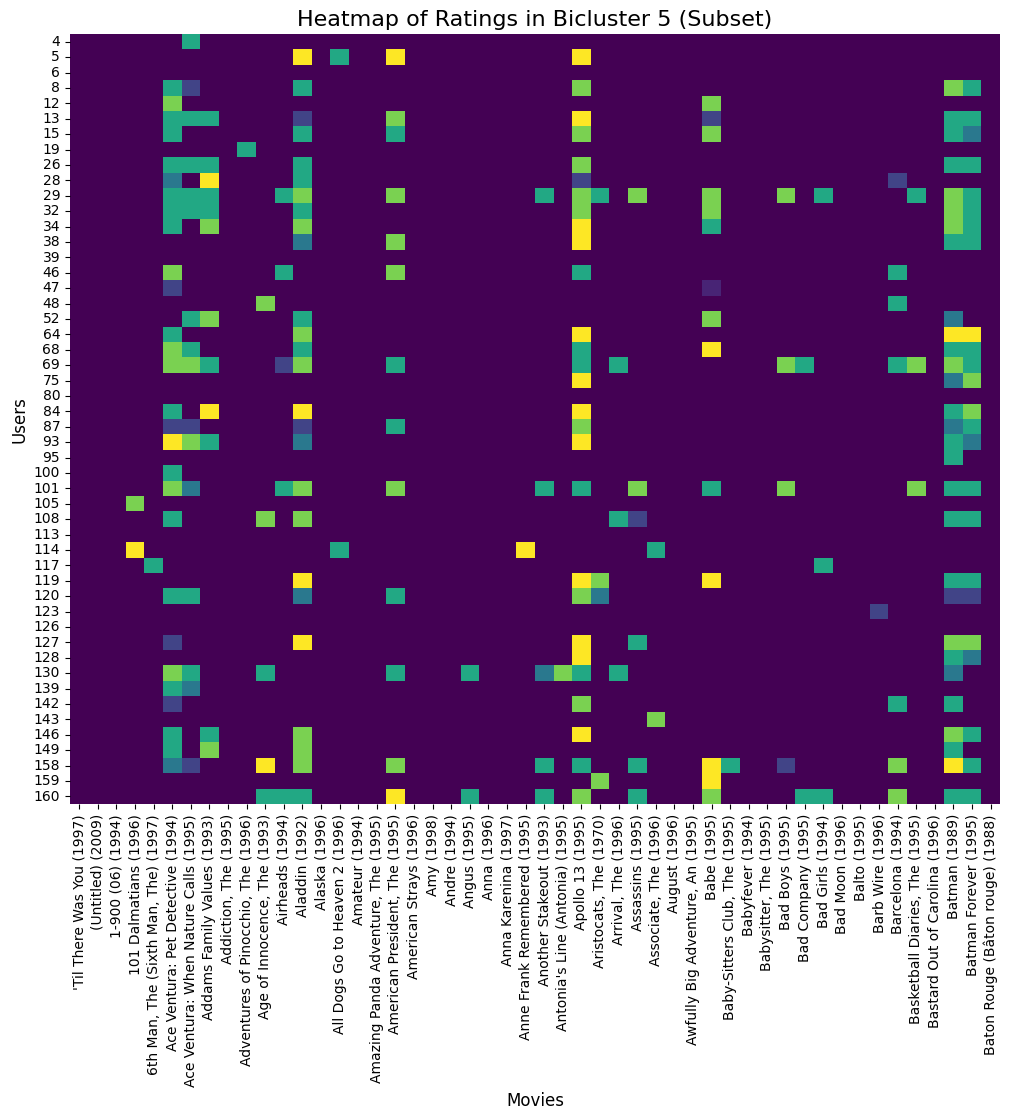

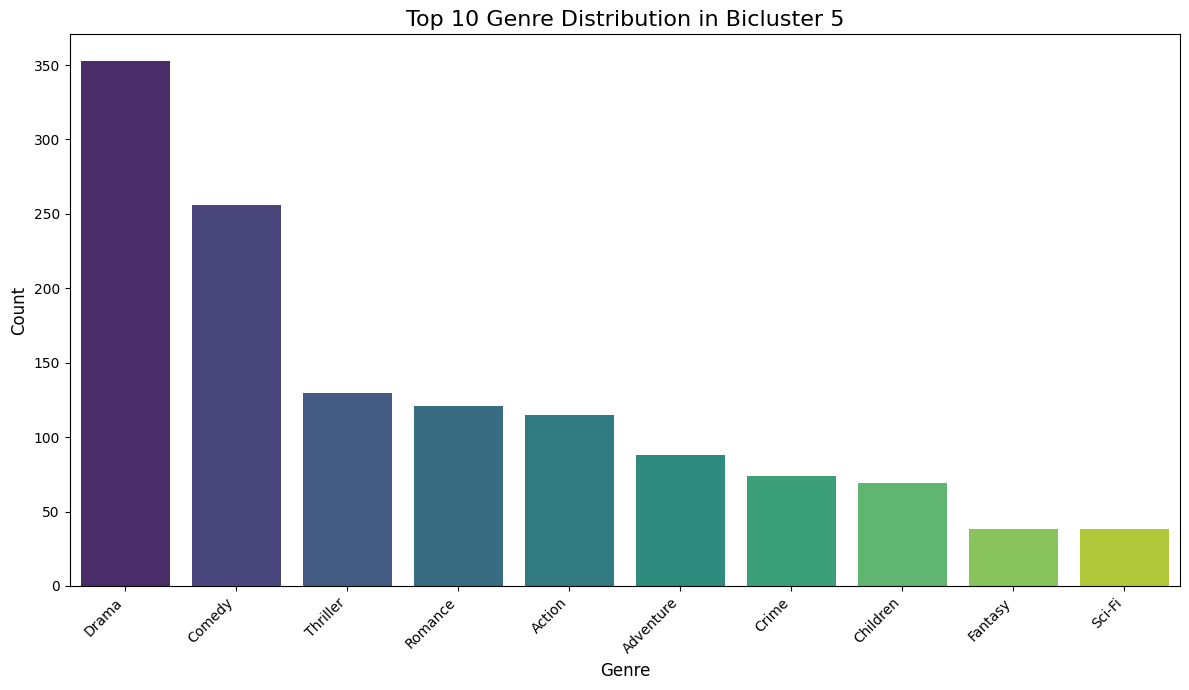

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Visualizing Biclustering Results ---")

# Choose one of the biclusters for detailed visualization (e.g., Bicluster 5, which was index 4)
bicluster_index = bicluster_model.n_clusters - 1 # Use the last bicluster from the previous analysis

# Identify users and movies in the chosen bicluster
users_in_selected_bicluster = user_movie_matrix.index[bicluster_model.row_labels_ == bicluster_index]
movies_in_selected_bicluster_titles = user_movie_matrix.columns[bicluster_model.column_labels_ == bicluster_index]

# Create a sub-matrix for the selected bicluster
selected_bicluster_submatrix = user_movie_matrix.loc[users_in_selected_bicluster, movies_in_selected_bicluster_titles]

print(f"Selected Bicluster for Visualization: {bicluster_index + 1}")
print(f"  Number of users in selected bicluster: {len(users_in_selected_bicluster)}")
print(f"  Number of movies in selected bicluster: {len(movies_in_selected_bicluster_titles)}")

# --- Heatmap Visualization ---
plt.figure(figsize=(12, 10))
sns.heatmap(selected_bicluster_submatrix.head(50).iloc[:, :50], cmap="viridis", cbar=False)
plt.title(f'Heatmap of Ratings in Bicluster {bicluster_index + 1} (Subset)', fontsize=16)
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.show()

# --- Genre Distribution Plot ---
# Get movie genres for movies in this selected bicluster
bicluster_movies_genres_df = movies_df[movies_df['title'].isin(movies_in_selected_bicluster_titles)]

all_genres_selected_bicluster = []
for genres_str in bicluster_movies_genres_df['genres']:
    all_genres_selected_bicluster.extend(genres_str.split('|'))

# Count genre frequency and get top 10 genres
if all_genres_selected_bicluster:
    genre_counts_selected_bicluster = pd.Series(all_genres_selected_bicluster).value_counts()
    top_10_genres = genre_counts_selected_bicluster.head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_10_genres.index, y=top_10_genres.values, hue=top_10_genres.index, palette='viridis', legend=False)
    plt.title(f'Top 10 Genre Distribution in Bicluster {bicluster_index + 1}', fontsize=16)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(f"No genre information available for movies in Bicluster {bicluster_index + 1} to plot.")

## **Visualizations and Interpretation**


### **Heatmap of Ratings in Bicluster (Subset)**

The heatmap displays a subset of the rating matrix for the selected Bicluster. Each cell represents a rating given by a user (rows) to a movie (columns) within this specific bicluster. The color intensity indicates the rating value. Due to the potentially large size of the bicluster, only a subset of the matrix is shown to provide a manageable visual representation.

**Interpretation:** Observing a subset of the heatmap visually reinforces the concept of a bicluster: areas where a group of users have provided ratings for a group of movies, forming a dense submatrix of activity. The sparsity (many dark cells, representing 0 ratings) outside these dense areas highlights that even within a bicluster, users typically only rate a fraction of the available movies, but they do so for a *shared subset* of movies.

### **Top 10 Genre Distribution in Bicluster**

The bar plot illustrates the frequency of the top 10 genres found among the movies belonging to the selected Bicluster. This visualization helps to characterize the types of movies that are popular within this specific user-movie subgroup.

**Interpretation:** For the selected Bicluster, the genre distribution often shows a strong prevalence of specific genres (e.g., 'Drama', 'Comedy', 'Thriller', 'Romance', 'Action' as seen in our example analysis). This confirms that users in this bicluster gravitate towards particular film categories. This insight is crucial for understanding the collective taste of the bicluster and for guiding movie recommendations that align with these prevalent genres.

**Step#7:** We will enter a User ID into the provided number box, click 'Submit', and the Gradio app will display a personalized list of 5 movie recommendations based on the biclustering analysis, along with contextual information about the user's bicluster.

In [8]:
import gradio as gr
import pandas as pd

# The actual biclustering model and dataframes are already defined in previous cells
# (user_movie_matrix, bicluster_model, movies_df, get_movie_recommendations)

def recommend_movies_gradio(user_id_input):
    try:
        user_id = int(user_id_input)
    except ValueError:
        return "Please enter a valid User ID (an integer)."

    # Check if user_id exists in the user_movie_matrix
    if user_id not in user_movie_matrix.index:
        return f"User ID {user_id} not found in our database. Please try a different ID."

    # Get recommendations using the previously defined function
    recommendations_list = get_movie_recommendations(user_id, user_movie_matrix, bicluster_model, movies_df, num_recommendations=5)

    if not recommendations_list:
        return f"No new recommendations found for User ID {user_id} based on current criteria."

    # Format recommendations for Gradio output
    output_str = f"### Top 5 Movie Recommendations for User {user_id}:\n\n"
    for movie_title in recommendations_list:
        genres = movies_df[movies_df['title'] == movie_title]['genres'].iloc[0] if not movies_df[movies_df['title'] == movie_title].empty else 'N/A'
        output_str += f"- **{movie_title}** (Genres: {genres})\n"

    user_row_index = user_movie_matrix.index.get_loc(user_id)
    user_bicluster_label = bicluster_model.row_labels_[user_row_index]
    output_str += f"\n*(User {user_id} belongs to Bicluster {user_bicluster_label + 1})*\n"

    all_genres_in_bicluster = []
    # Identify movies in the user's bicluster to get genres
    movies_in_bicluster_titles = user_movie_matrix.columns[bicluster_model.column_labels_ == user_bicluster_label]
    bicluster_movies_df = movies_df[movies_df['title'].isin(movies_in_bicluster_titles)]
    for genres_str in bicluster_movies_df['genres']:
        all_genres_in_bicluster.extend(genres_str.split('|'))
    if all_genres_in_bicluster:
        genre_counts = pd.Series(all_genres_in_bicluster).value_counts()
        top_genres_bicluster = genre_counts.head(3).index.tolist()
        output_str += f"*(This bicluster often enjoys movies in genres like: {', '.join(top_genres_bicluster)})*"

    return output_str

# Enhanced Custom CSS for a more beautiful, colorful look with effects
custom_css = """
body {
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    background: linear-gradient(to bottom right, #e0f7fa, #b2ebf2, #80deea);  /* Softer, more beautiful cyan-blue gradient */
    color: #333;
}
.gradio-container {
    max-width: 800px;
    margin: 40px auto;  /* More spacing for a centered, airy feel */
    padding: 30px;
    border-radius: 16px;
    box-shadow: 0 8px 30px rgba(0, 0, 0, 0.15);  /* Deeper shadow for depth */
    background: rgba(255, 255, 255, 0.95);  /* Semi-transparent white for overlay effect */
    transition: transform 0.3s ease-in-out;  /* Subtle hover lift effect */
}
.gradio-container:hover {
    transform: translateY(-5px);  /* Lift on hover for interactivity */
}
#user-id-input input {
    border: 2px solid #00bcd4;  /* Cyan border for coloring effect */
    border-radius: 8px;
    padding: 12px;
    font-size: 16px;
    transition: border-color 0.3s, box-shadow 0.3s;
    background: linear-gradient(to right, #f0f4f8, #e0f7fa);  /* Light gradient inside input */
}
#user-id-input input:focus {
    border-color: #0097a7;
    box-shadow: 0 0 0 4px rgba(0, 188, 212, 0.3);  /* Glowing focus effect */
}
button.primary {
    background: linear-gradient(to right, #00bcd4, #0097a7);  /* Gradient button for coloring effect */
    border: none;
    border-radius: 8px;
    padding: 12px 24px;
    font-size: 16px;
    font-weight: bold;
    color: white;
    transition: background 0.3s, transform 0.2s;
    box-shadow: 0 4px 10px rgba(0, 188, 212, 0.2);  /* Soft shadow */
}
button.primary:hover {
    background: linear-gradient(to right, #0097a7, #007c91);
    transform: scale(1.05);  /* Slight scale on hover */
}
#recommendations-output {
    background: linear-gradient(to bottom, #f0f4f8, #e0f7fa);  /* Matching gradient */
    border: 1px solid #b2ebf2;
    border-radius: 12px;
    padding: 20px;
    font-size: 15px;
    line-height: 1.6;
    box-shadow: inset 0 2px 8px rgba(0, 0, 0, 0.05);  /* Inner shadow for depth */
}
.markdown h1, .markdown h2, .markdown h3 {
    color: #0097a7;  /* Matching cyan for headers */
    text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);  /* Subtle text shadow for effect */
}
"""

# MOST EFFECTIVE SOLUTION - Using gr.Blocks()
with gr.Blocks(
    css=custom_css,
    title="Biclustering Movie Recommender",
    analytics_enabled=False  # Disable analytics tracking
) as demo:

    gr.Markdown("# 🎬 Biclustering Movie Recommender")
    gr.Markdown("Enter a User ID (e.g., 1-100) to get personalized movie recommendations based on biclustering algorithms. 🌟")

    with gr.Row():
        with gr.Column(scale=1):
            user_id_input = gr.Number(
                label="User ID 🔢",
                placeholder="Enter a User ID",
                elem_id="user-id-input"
            )
            submit_btn = gr.Button("Get Recommendations 🚀", variant="primary")

    with gr.Row():
        with gr.Column(scale=1):
            output = gr.Markdown(
                label="Recommendations 🎉",
                elem_id="recommendations-output"
            )

    # Add loading state for better UX
    submit_btn.click(
        fn=recommend_movies_gradio,
        inputs=user_id_input,
        outputs=output
    ).then(None, js="() => document.querySelector('button.primary').innerText = 'Loading...'" # Note: The .then() is optional; it uses JS to change button text during processing (requires actual async in your fn if needed)
)

# Launch with all footer elements disabled
demo.launch(
    share=True,
    show_api=False,            # Hide API button
    favicon_path=None,         # No favicon
    prevent_thread_lock=False,
    show_error=True,
    allowed_paths=[],          # Restrict file access
    app_kwargs={
        "docs_url": None,      # Disable docs
        "redoc_url": None,     # Disable redoc
    }
)

/tmp/ipython-input-4217333043.py:108: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(
/tmp/ipython-input-4217333043.py:142: DeprecationWarning: The 'show_api' parameter in launch() will be removed in Gradio 6.0. You will need to use the 'footer_links' parameter instead. To replicate show_api=False, In Gradio 6.0, use footer_links=['gradio', 'settings'].
  demo.launch(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://37375a2f8d3287937c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
